In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**A supercar with rocket engines on two sides**

You are the driver of your awesome supercar on an infinitely long road, equipped with rocket engines on both the left and right sides. You can accelerate or decelerate the car, but remember that the power of your car is limited.

Given the initial position and velocity, your mission is simple : park your car at the origin (=make the position and velocity 0 simultaneously) and minimize the stopping time. Show your driving skills!

**Example 1.**

* We have a priori bang-bang assumption (i.e., your car is always at full power)
* We completely know the classical mechanics.
* We know how to minimize the stopping time by using the ad hoc geometric method.


Q1. Define the optimal thrust function whose inputs are the current position and velocity.

Q2. Employing that function, write the code that outputs the optimal stopping time and the corresponding trajectory. Discretize the time interval(=use a small time step dt<<<1)

Q3. Plot the velocity-position, position-time, velocity-time, and acceleration-time graphs.

Put the initial position q_0= 20
Put the initial velocity v_0= -10
20.951


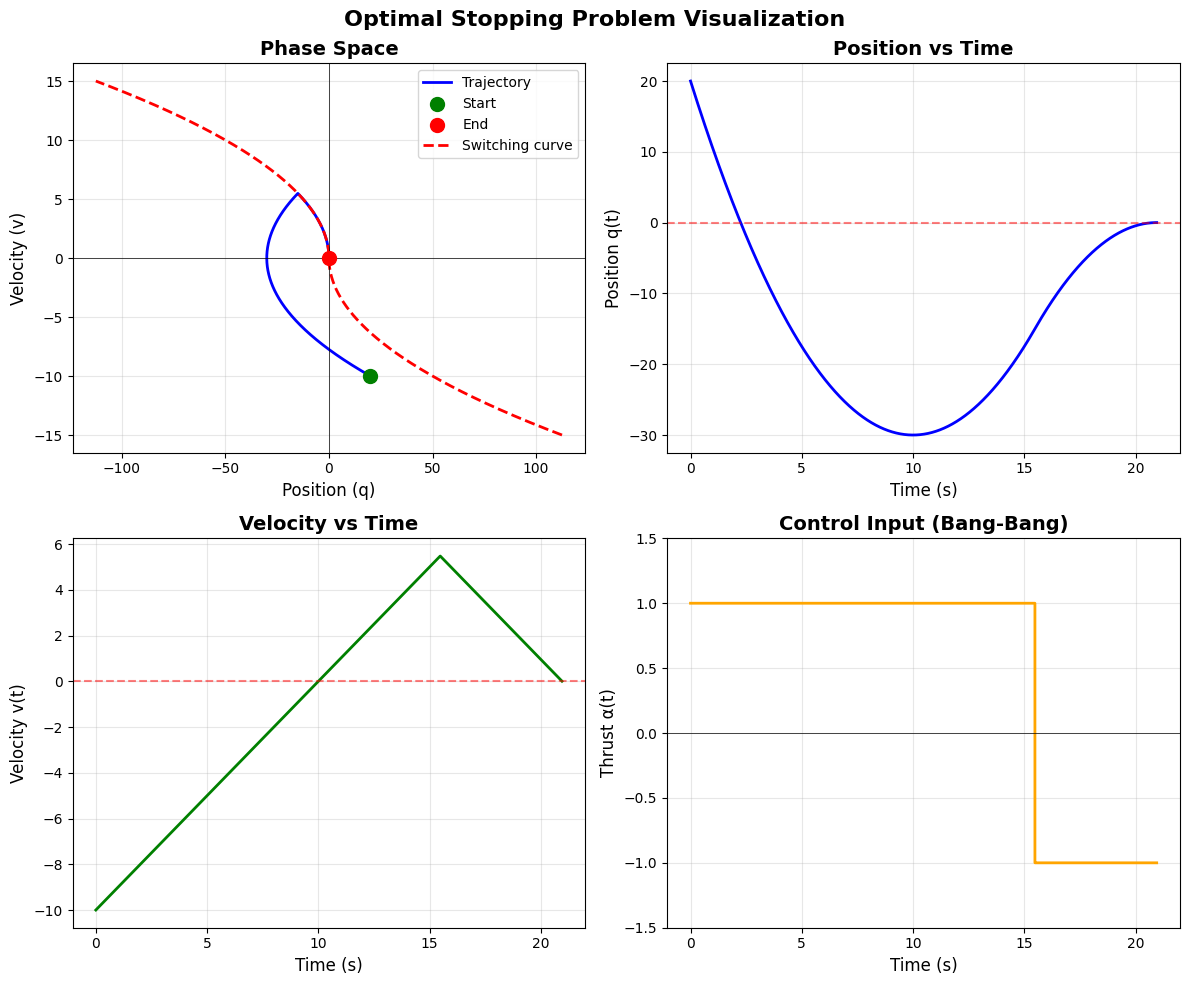


Simulation details:
Total steps: 20951
Time step: 0.001


In [ ]:
#Basic example: A supercar with rocket engines on two sides:
#position q(t), thrust \alpha(t) (|\alpha(t)| <= 1)
#minimize the "stopping time"

#initial setting
q_0=float(input('Put the initial position q_0= '))
v_0=float(input('Put the initial velocity v_0= '))
dt = 0.001
step = 0
x = np.array([q_0, v_0])

#lists
q_history = [q_0]
v_history = [v_0]
t_history = [0]
alpha_history = []

#thrust
def alpha(q,v):
  if v*abs(v)+2*q>0:
    thrust = -1
  elif v*abs(v)+2*q<0:
    thrust = 1
  elif v>0:
    thrust = -1
  elif v<0:
    thrust = 1
  else:
    thrust = 0
  return thrust

while np.linalg.norm(x)> 0.01 :
  q, v = x[0], x[1]
  a = alpha(q,v)
  x[0] += 1/2 * (2*v + a *dt) * dt
  x[1] += a * dt
  step += 1

  #lists
  q_history.append(x[0])
  v_history.append(x[1])
  t_history.append(step * dt)
  alpha_history.append(a)

print(round(step * dt, 3))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Optimal Stopping Problem Visualization', fontsize=16, fontweight='bold')

# 1. Phase Space (가장 중요!)
ax1 = axes[0, 0]
ax1.plot(q_history, v_history, 'b-', linewidth=2, label='Trajectory')
ax1.scatter([q_0], [v_0], color='green', s=100, zorder=5, label='Start')
ax1.scatter([q_history[-1]], [v_history[-1]], color='red', s=100, zorder=5, label='End')

# 스위칭 곡선: v^2/2 + q = 0 => q = -v^2/2
v_switch = np.linspace(-15, 15, 500)
q_switch = -v_switch * np.abs(v_switch) / 2
ax1.plot(q_switch, v_switch, 'r--', linewidth=2, label='Switching curve')

ax1.set_xlabel('Position (q)', fontsize=12)
ax1.set_ylabel('Velocity (v)', fontsize=12)
ax1.set_title('Phase Space', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# 2. Position vs Time
ax2 = axes[0, 1]
ax2.plot(t_history, q_history, 'b-', linewidth=2)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Position q(t)', fontsize=12)
ax2.set_title('Position vs Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# 3. Velocity vs Time
ax3 = axes[1, 0]
ax3.plot(t_history, v_history, 'g-', linewidth=2)
ax3.set_xlabel('Time (s)', fontsize=12)
ax3.set_ylabel('Velocity v(t)', fontsize=12)
ax3.set_title('Velocity vs Time', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# 4. Control Input (Thrust)
ax4 = axes[1, 1]
ax4.step(t_history[:-1], alpha_history, 'orange', linewidth=2, where='post')
ax4.set_xlabel('Time (s)', fontsize=12)
ax4.set_ylabel('Thrust α(t)', fontsize=12)
ax4.set_title('Control Input (Bang-Bang)', fontsize=14, fontweight='bold')
ax4.set_ylim([-1.5, 1.5])
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

# 추가 정보 출력
print(f'\nSimulation details:')
print(f'Total steps: {step}')
print(f'Time step: {dt}')

**Question 1.**

* We have a priori bang-bang assumption.
* We completely know the classical mechanics.
* We **do not** know how to minimize the stopping time.
* Nevertheless, we know **machine learning**.

Q1. Define an appropriate class for modeling the car.

Q2. Set up the neural network and training environment. Provide only the bang-bang assumption to the computer!

Q3. Plot the result. Compare this to the previous (analytic) one.

**Example 1.**

* We have a priori bang-bang assumption (i.e., your car is always at full power)
* We completely know the physical dynamics and results.
* We know how to minimize the stopping time by using the ad hoc. geometric method.


Q1. Define the optimal thrust function whose inputs are the current position and velocity.

Q2. Employing that function, write the code that outputs the optimal stopping time.

Q3. Plot the velocity-position, position-time, velocity-time, and acceleration-time graphs.

--------------------------------------------------

**A magician and a pendulum**

You are a magician and you have a hanging pendulum. You can exert force to the pendulum, but remember that your magic power is limited.

Given the initial position and velocity of the pendulum, your mission is the same : make the position and velocity 0 simultaneously and minimize the stopping time.

**Question 2.**

* We have a priori bang-bang assumption.
* We only know **the governing equation** of the pendulum.
* We do not know how to minimize the stopping time.
* We know machine learning.


Q. Do the same as in **Question 1**, except that you must simulate the behavior of the pendulum by Runge-Kutta 4 method.



-----------------------------------------------------------------------

**A stock contest**

You are the key player in a stock contest. Your strategy is the following : part of the profit is reinvested, and the rest is saved. Surely you need to prove your investment skills at adjusting the reinvestment-ratio.

Given the seed money and the end time of the contest, you need to maximize your total profit.

**Question 3.**

* We **do not** have a priori bang-bang assumption.
* We completely know **the closed form of the payoff functional(=total profit)**.
* We do not know how to maximize the total profit.
* We know machine learning.


Q. By using machine learning technique, find the optimal investment strategy.